# The first part of the assignment, IDS 2021-2022
In this Jupyter notebook, please, document your results and the way you have obtained them. You can use the attached yaml file to build Python environment for this assignment. Another option (and the easiest way) is to just use the _Python environment_ provided at the beginning of the course and then use *pip install* to install *p_decision_tree* library. You can find the required yaml file in the folder of this assignment. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupyter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


<font color="red"><b>Student Names and IDs:
    
    1. Konstantin Kaulen, 397150
    
    2. Laszlo Dirks, 398777
    
    3.

## Dataset
Almost all of us have the experience of being stuck in an airport because our flight was delayed or canceled. As a person who knows how to analyze data, we all wondered if we could have predicted it if we had access <b>to</b>  the data. This is your chance to find out.

In this assignment, you will perform some analysis on a flight delay dataset. This dataset is provided by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) which tracks the on-time performance of domestic flights operated by large air carriers. In the following, you can find the definition of some of the features in this dataset.

<b>Airline delay.</b> 
This type of delay pertains to the status within the airline’s control. For example, problems with maintenance and crew, cleaning within the cabin, fueling, and baggage loading could all be contributing factors to a delayed flight. 

<b>Security delay.</b> 
Security delay is caused by evacuation of a terminal or concourse, re-boarding of an aircraft because of a security breach, inoperative screening equipment, and/or long lines in excess of 29 minutes at screening areas.

<b>Weather delay.</b> 
Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

<b>Late aircraft delay.</b> 
Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

<b>Taxi in/out.</b> 
Taxi time is the total time of an aircraft's movement on the ground.

<b>Wheels-off.</b> 
The time that an aircraft lifts off from the origin airport.
    
<b>Wheels-on.</b> 
 The time that an aircraft lands at the designated airport.

<b> Air time.</b> 
The time from the moment an aircraft leaves the surface until it comes into contact with the surface at the next point of landing.

## Question 0 - Preprocessing of the Dataset 
 Carry out the following preprocessing steps before starting the analysis:
 - Select 95% of the dataset provided for this assignment by random sampling.
     - Use one of the group member's student numbers as a seed.
     - Rename the newly generated dataset (which contains 95% of the data) to <b>sampled_data</b>.
 - If it is not mentioned otherwise, you should always use <b>sampled_data</b> created in this step as input for the questions.
 
<font color="red">Note: Your assignment would not be graded if this step is not done. </font>

In [1]:
import pandas

dataset = pandas.read_csv("./dataset.csv")
sampled_data = dataset.sample(frac=0.95, random_state=397150)
sampled_data.to_csv("./sampled_data.csv")

## Question 1 - Insights into the Data (20 points):

### Setting of this Question:
We want to make ourselves familiar with the data. To this end, we start with an explorative data analysis. You are more than welcome to provide a deeper analysis and generate more visualizations to understand the data better. Please follow the next two parts.

### Part 1: Basic data analysis
To investigate the data, we take a look at some of the basic statistics and properties of the data.

#### a) Unique values: 
Mention the unique values for cancelation reason in the <b>sampled_data</b>. Also, mention the unique values of this feature where the flights have been canceled and where the flights have not been canceled. Explain the difference.

In [2]:
# Your code
cancellation_reasons = sampled_data["CANCELLATION_REASON"]
print("Unique values for cancellation reason:", set(cancellation_reasons))
cancellations = sampled_data[sampled_data["CANCELLED"] == 1]
print("Unique Values for Cancellation Reason where flight has been cancelled", set(cancellations["CANCELLATION_REASON"]))
no_cancellations = sampled_data[sampled_data["CANCELLED"] == 0]
print("Unique Values for Cancellation Reason where flight has not been cancelled", set(no_cancellations["CANCELLATION_REASON"]))


Unique values for cancellation reason: {'D', 'C', 'B', 'N', 'A'}
Unique Values for Cancellation Reason where flight has been cancelled {'D', 'C', 'A', 'B'}
Unique Values for Cancellation Reason where flight has not been cancelled {'N'}


    Your answer:
    The unique values for cancellation reason in the sampled_data are A, B, C, D, and N. The cancellation reason N only occurs for flights that have not been cancelled, thus it can be seen as a placeholder. 
    The values A, B, C, and D occur solely in flights that have been cancelled, thus these attribute values explain the cancellation reason of the flight.  

#### b) Null values: 
Remove all the rows with null values from the <b>sampled_data</b>. Let's call this new dataset <b>no_null_data</b>. Show the unique values for cancelation reason in <b>no_null_data</b> and compare them to the unique values in <b>sampled_data</b>. Can you explain the difference? 

In [3]:
no_null_data = sampled_data.dropna()
no_null_data.to_csv("./no_null_data.csv")
cancellation_reasons = no_null_data["CANCELLATION_REASON"]
print(set(cancellation_reasons))

{'N'}


    Your answer:
    For all flights in no_null_data, the cancellation reason equals N. We saw in the previous step, that N serves as a placeholder for the cancellation reason of uncancelled flights.
    Accordingly, all other values of cancellation reason refer to cancelled flights, thus these flights have attributes equalling null, e.g. DEPARTURE_TIME or AIR_TIME. In contrary, these values
    are not null for the uncancelled flights. 

#### c) Boxplot:
Use <b>no_null_data</b> dataset to create a new dataset including all the flights from airline 'EV' which have at least 2 hours but at most 6 hours of delay. Let's call this data <b>ev_data</b>.

Use a boxplot to create two datasets from <b>ev_data</b> by finding and removing the outliers from the following attributes:
   - Late aircraft delay, call this dataset <b>cleaned_data_late_aircraft</b>,
   - Air system delay, call this dataset <b>cleaned_data_air_system</b>.
    
Note that based on the boxplot, the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers.

0.0 340.0
0.0 65.0


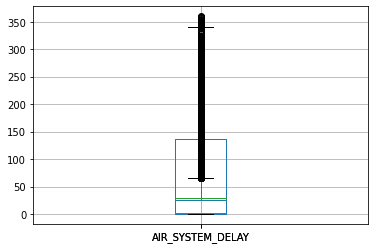

In [4]:
ev_data = no_null_data.loc[(no_null_data["AIRLINE"] == "EV") & (no_null_data["ARRIVAL_DELAY"] >= 120) & (no_null_data["ARRIVAL_DELAY"] <= 360)]
# boxplots = ev_data.boxplot(column=["AIR_SYSTEM_DELAY", "LATE_AIRCRAFT_DELAY"])
# print(boxplots)
def clean_data(dataset: pandas.DataFrame, column_name):
    boxplot_img, values = ev_data.boxplot(column=[column_name], return_type="both")
    whiskers = [whisker.get_ydata() for whisker in values["whiskers"]]
    upper_whisker = whiskers[1][1]
    lower_whisker = whiskers[0][1]
    print(lower_whisker, upper_whisker)
    return dataset.loc[(dataset[column_name] > lower_whisker) & (dataset[column_name] < upper_whisker)]

cleaned_data_late_aircraft = clean_data(ev_data, "LATE_AIRCRAFT_DELAY")
cleaned_data_air_system = clean_data(ev_data, "AIR_SYSTEM_DELAY")
cleaned_data_late_aircraft.to_csv("./cleaned_data_late_aircraft.csv")
cleaned_data_air_system.to_csv("./cleaned_data_air_system.csv")

#### d) Basic statistics: 
Compare basic statistical features of arrival delay (median, mean, and mode, standard deviation, variance) in the <b>ev_data</b>, <b>cleaned_data_late_aircraft</b>, and <b>cleaned_data_air_system</b>. 

Interpret the differences for these statistical values between these three datasets. 

In [5]:
for index, dataset in enumerate([ev_data, cleaned_data_late_aircraft, cleaned_data_air_system]):
    print(index)
    arrival_delay = dataset["ARRIVAL_DELAY"]
    print("\t MEDIAN:", arrival_delay.median())
    print("\t MEAN:", arrival_delay.mean())
    print("\t MODE:", arrival_delay.mode().to_list())
    print("\t STANDARD DEVIATION:", arrival_delay.std())
    print("\t VARIANCE:", arrival_delay.var())
    
    
    

0
	 MEDIAN: 165.0
	 MEAN: 181.92060252672496
	 MODE: [121.0]
	 STANDARD DEVIATION: 55.11974094987752
	 VARIANCE: 3038.1858423816047
1
	 MEDIAN: 161.0
	 MEAN: 177.03417118449153
	 MODE: [121.0]
	 STANDARD DEVIATION: 51.17275466796622
	 VARIANCE: 2618.6508203078583
2
	 MEDIAN: 163.0
	 MEAN: 180.3658536585366
	 MODE: [121.0]
	 STANDARD DEVIATION: 54.21851738495189
	 VARIANCE: 2939.64762742233


    Your answer: 
    

### Part 2: Basic visualization

#### a) Mean visualization: 
Visualize and compare the mean of arrival delay per month in the <b>no_null_data</b>. Just based on this information, if you prefer the minimum delay, which two months would be a good option to book a ticket and which two months are the worst.

MONTH
1     56.566223
2     59.334128
3     56.871886
4     56.148108
5     60.569919
6     63.668954
7     59.460807
8     59.774049
9     54.856815
10    55.032948
11    57.589569
12    62.632459
Name: ARRIVAL_DELAY, dtype: float64

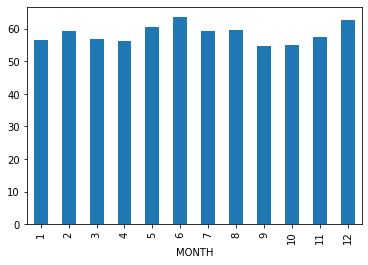

In [6]:
no_null_data.groupby(by=["MONTH"])["ARRIVAL_DELAY"].mean().plot(kind="bar")
no_null_data.groupby(by=["MONTH"])["ARRIVAL_DELAY"].mean()

    Your answer:
    The two best options to book a ticket are the months September and October and the worst options are the months June and December.

#### b) Mean visualization:
Visualize and compare the mean of weather delay per month in the <b>no_null_data</b>. Which month has the minimum and which month has the maximum average weatherdelay? 

<AxesSubplot:xlabel='MONTH'>

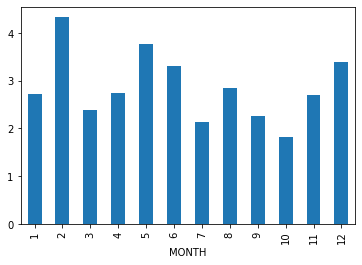

In [7]:
no_null_data.groupby(by=["MONTH"])["WEATHER_DELAY"].mean().plot(kind="bar")

    Your answer:
    The highest average weather delay is measurable in February, while the lowest weather delay is measurable in October.


#### c) Interpretation:
Based on the visualization of the two previous tasks, can you detect any possible relationship between the arrival delay and weather delay per month? If yes, please explain.

    Your answer:
    

#### d) Mean visualization: 
Now visualize the mean of arrival delay per day of the week (per 7 week days) in each month. Based on this information, which combination of days of week and months should be avoided to decrease the possibility of the arrival delay the most? Provide 5 combinations of days of week and months.

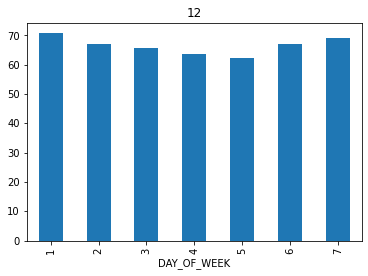

In [12]:
import pandas
import seaborn as sns

no_null_data = pandas.read_csv("./no_null_data.csv")
months = no_null_data.groupby(by=["MONTH"])
for name, group in months:
    group.groupby(by=["DAY_OF_WEEK"])["ARRIVAL_DELAY"].mean().plot(kind="bar", title=name).get_figure().savefig(f"./ARRIVAL_DELAY_{name}.jpg", transparent=False)


    Your answer:
    The resulting plots are provided in the files ARRIVAL_DELAY_{month}.jpg. The following combinations of month and day should be avoided to decrease the possibility of arrival delay the most:
    - May, Monday
    - June, Monday
    - June, Tuesday
    - November, Saturday
    - December, Monday
    - December, Sunday

#### e) Distribution:
 In <b>no_null_data</b>, plot the distribution of weather delay for those flights with at least 3 hours of weather delay.

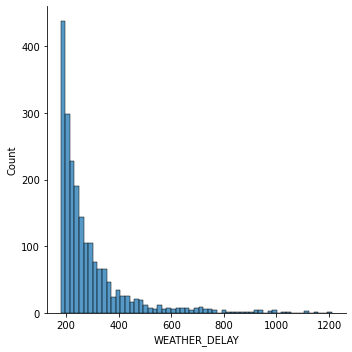

In [5]:
at_least_three_hours_of_weather_delay = no_null_data[no_null_data["WEATHER_DELAY"] >= 180]
sns.displot(data=at_least_three_hours_of_weather_delay, x="WEATHER_DELAY")

#### f) Monthly distribution:
Plot the monthly distribution of weather delay in one figure where weather delay is more than 3 hours in <b>no_null_data</b>.

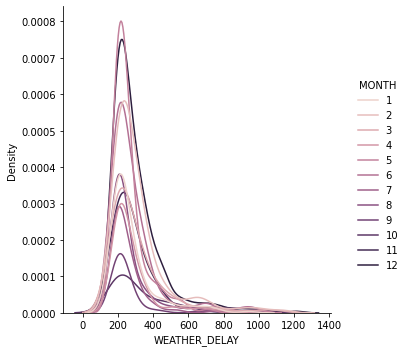

In [13]:
import seaborn as sns

sns.color_palette("husl", 12)
sns.displot(data=at_least_three_hours_of_weather_delay, x="WEATHER_DELAY", hue="MONTH", kind="kde")

#### g) Joint distribution:
Explore the distribution of weather delay and arrival delay together in the <b>no_null_data</b> for airlines 'EV' and 'VX', considering only the flights that the arrival delay is more than 6 hours. Can you find any similarities or differences among them? Please explain.

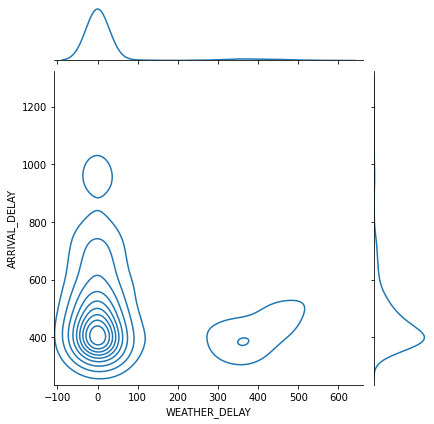

In [6]:
import pandas
import seaborn as sns
no_null_data = pandas.read_csv("./no_null_data.csv")


ev_and_vx_airlines = no_null_data.loc[(no_null_data["AIRLINE"] == 'EV') | (no_null_data["AIRLINE"] == 'VX')]
ev_and_vx_airlines = ev_and_vx_airlines.loc[(ev_and_vx_airlines["ARRIVAL_DELAY"] > 360)]
sns.jointplot(data=ev_and_vx_airlines, x="WEATHER_DELAY", y="ARRIVAL_DELAY", kind="kde")

       Your answer:
       TODO

## Question 2 - Decision Trees (10 points):

### Setting of this Question:
We want to buy a ticket from 'UA' airline. As we are not a big fan of flights that have a long delay, we have decided to use a decision tree to find the best time to buy the ticket. Our plan is to use a decision tree to predict the arrival delay. But first, we need to preprocess the data. Please do the following tasks.  

#### a) Data preprocessing: 
Use <b>no_null_data</b> for this task and filter it such that the resulting dataset contains only the flights from 'UA' airline that has some (non zero) arrival delay. 

First, discretizing the arrival delay as follows:
 - if the delay is at most 45 minutes, the value of the new attribute should be 'acceptable_delay',
 - else, the value of the new attribute should be 'unacceptable_delay',
 
Let's call this new categorical feature 'DELAY'.

Second, discretize the distance into two equal-width bins and name them 'short' and 'long'. Let's call this new feature 'DISTANCE_CATEGORY'.

In [12]:
import numpy as np

decision_tree_data = no_null_data.loc[(no_null_data["AIRLINE"] == "UA") & (no_null_data["ARRIVAL_DELAY"] > 0)]
decision_tree_data["DELAY"] = pandas.cut(x=decision_tree_data["ARRIVAL_DELAY"], bins=[0,45,np.inf], labels=["acceptable_delay", "unacceptable_delay"])
decision_tree_data["DISTANCE_CATEGORY"] = pandas.cut(x=decision_tree_data["DISTANCE"], bins=2, labels=["short", "long"])

/tmp/ipykernel_16922/264514204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decision_tree_data["DELAY"] = pandas.cut(x=decision_tree_data["ARRIVAL_DELAY"], bins=[0,45,np.inf], labels=["acceptable_delay", "unacceptable_delay"])
/tmp/ipykernel_16922/264514204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decision_tree_data["DISTANCE_CATEGORY"] = pandas.cut(x=decision_tree_data["DISTANCE"], bins=2, labels=["short", "long"])


#### b) Decision tree:
Consider the extended dataset from the previous task (task a). Use 'SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', and 'DAY_OF_WEEK' as descriptive features. Generate a decision tree in which the minimum number of samples for splitting is 1000.

Note: for this task, you must use p_decision_tree library. You can use the attached yaml file to build Python environment for this task. The easiest way is to just use *pip install*.

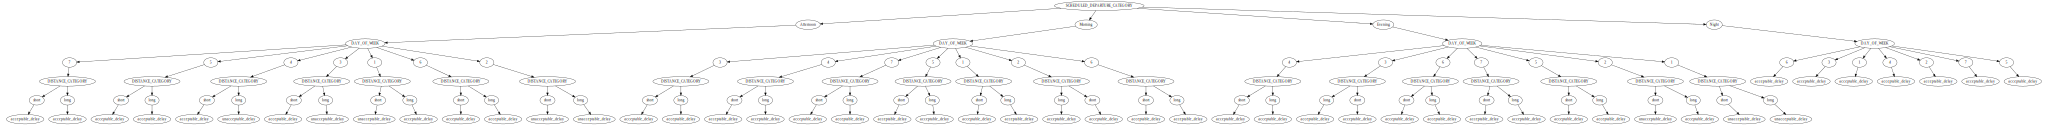

In [13]:
from IPython.display import display
from p_decision_tree.DecisionTree import DecisionTree

decision_tree_data = decision_tree_data.astype(str)

descriptive_features = ["SCHEDULED_DEPARTURE_CATEGORY", "DISTANCE_CATEGORY", "DAY_OF_WEEK"]
data_descriptive = decision_tree_data[descriptive_features].values
label = "DELAY"
label_data = decision_tree_data[label].values

tree = DecisionTree(data_descriptive.tolist(), descriptive_features, label_data.tolist(), "entropy")

tree.id3(0,1000)

tree_visualization = tree.print_visualTree(render=True)
display(tree_visualization)

#### c) ID3 feature selection:
In the generated decision tree, what is the best feature (based on entropy) for splitting the tree in the second round of ID3 considering the value of the feature chosen in the first round of ID3?       

    Your answer:
    The best feature for splitting the tree in the second round of ID3 is DAY_OF_WEEK, as it is visible in the resulting decision tree.
    

#### d) Rule interpretation:
Based on the discovered decision tree, which conditions are more prone to more than 45 minutes delay. Explain two rules.

    Your answer:
    Rule 1: SCHEDULED_DEPARTURE_CATEGORY == EVENING && DAY_OF_WEEK == 1 --> unacceptable_delay
    Explanation: TODO
    Rule 2: SCHEDULED_DEPARTURE_CATEGORY == MORNING && DAY_OF_WEEK == 3 && DISTANCE_CATEGORY == long --> unacceptable_delay
    Explanation: TODO

## Question 3 - Classification Models and Prediction (50 Points):

### Background of this Question:
You heard from a friend that you are entitled to receive a payment of at least 150€ if your flight is delayed by more than 3 hours. Very excited, you are reminded of your IDS course and the flight dataset you had to analyze back then. You start to imagine a model trained on these flights that can predict if your future flights are delayed by three hours and, basically, allow you to travel the world for free if it chooses these flights correctly. You remember your IDS lecture and what you have to do to make your dream come true: You want to prepare the data accordingly, i.e., you model the target variable of being delayed by more than 3 hours and you choose and model the descriptive variable that you want to use for predicting delay. For the evaluation of your models, you have to choose an evaluation metric that describes whether the flights chosen by your model are actually delayed by <b> at least </b> 3 hours. Moreover, for the models, you want to train different regression, SVM, and neural network models with different parameters and find the best one. In the end, you should calculate for which flight price your model lets you travel the world for free.
### Parts of this question:
We want you to systematically approach the questions. So we take the following steps (parts): preparing the data, what is the target variable, what are your descriptive variables, what is the evaluation measure you are trying to maximize, and what is the baseline you should at least be better than?

### Part 0: Preparing the dataset

Load the classification dataset; i.e., <b>flights_classifying.csv</b>.

In [14]:
flights_classifying_dataset = pandas.read_csv("flights_classifying.csv")

Error: no "view" rule for type "application/pdf" passed its test case
       (for more information, add "--debug=1" on the command line)
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'output/visualTree.gv.pdf'


Randomly order the data points using one of the group member's students as the random state.

In [15]:
flights_classifying_dataset = flights_classifying_dataset.sample(frac=1, random_state=397150)

### Part 1: Designing your variables and evaluation

#### a) Target feature:
Design your target feature such that you can predict whether a flight is delayed by more than 3 hours or not and add it to the dataset. Drop all data points that contain a canceled flight.

In [16]:
flights_classifying_dataset = flights_classifying_dataset.loc[flights_classifying_dataset["CANCELLED"]  == 0]
flights_classifying_dataset["TARGET_FEATURE"] = flights_classifying_dataset["ARRIVAL_DELAY"] > 180

#### b) Descriptive features:
Please select your descriptive features and motivate your choice. Always consider the setting and whether choosing these features makes sense concerning the setting of the question. Apply the necessary transformations.

In [17]:
from sklearn.preprocessing import LabelEncoder

# select necessary features
descriptive_attributes = ['MONTH','DAY','DAY_OF_WEEK','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','SCHEDULED_DEPARTURE','DISTANCE','SCHEDULED_DEPARTURE_CATEGORY']
flights_subset = flights_classifying_dataset[descriptive_attributes + ['TARGET_FEATURE']]

# apply label encoder
# does not really make sense for linear regression, 
# but we get too many fetures with a one-hot encoding
encoder = LabelEncoder()
flights_subset_transformed = flights_subset.apply(encoder.fit_transform)
flights_subset_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525584 entries, 505381 to 379729
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   MONTH                         525584 non-null  int64
 1   DAY                           525584 non-null  int64
 2   DAY_OF_WEEK                   525584 non-null  int64
 3   AIRLINE                       525584 non-null  int64
 4   ORIGIN_AIRPORT                525584 non-null  int64
 5   DESTINATION_AIRPORT           525584 non-null  int64
 6   SCHEDULED_DEPARTURE           525584 non-null  int64
 7   DISTANCE                      525584 non-null  int64
 8   SCHEDULED_DEPARTURE_CATEGORY  525584 non-null  int64
 9   TARGET_FEATURE                525584 non-null  int64
dtypes: int64(10)
memory usage: 44.1 MB


We may only use those features that are known prior to booking a plane ticket.
Further, the values of each feature must allow for some generaliziablity. For example the year in which a plane took of has no explanatory power for future bookings.

Split your data into training and testing data, with 85% of the dataset going to testing data.

In [18]:
length = len(flights_subset_transformed)
training, testing = np.split(flights_subset_transformed, [int(0.15*length)])


#### c) Evaluation metric
Discuss and choose an evaluation metric that you can evaluate your predictions against. Hint: Be aware of the setting of this questions, i.e., what your goal is.

In [19]:
#you may put code here, if necessary

    Your answer:
    
    

As we have a classification problem of two classes and our primariy goal is to travel the world for free, we should avoid booking a flight that ends up not being delayed at least 3 hours. The other missclassification case that we do not book a flight, which in the end is delayed at least 3 hours is not as harmful for our budget, but as we do want to travel somewhere we should also take this error into account. In conclusion, using accuracy as an evaluation metric is a reasonable choice.

#### d) Evaluation baseline
Calculate the baseline of the evaluation metric, i.e., a value you can achieve without any model by basic data analysis.

In [20]:
n = len(testing)
k = len(testing.loc[testing['TARGET_FEATURE'] == 1])
accuracy = ((k/n) + ((n-k)/n))/2 #lol
print(accuracy)

0.5


    Your answer:
    
    

If we have a set of flight n instances with k positive instances and only flip a coin in order to guess whether a flight will be delayed, there is a chance of 0.5*(k/n) that we have a True Positive instance and a chance of 0.5*((n-k)/n) that it is a True Negative. Thus, (actually independent of the test set) the accuarcy of our model should be at least 0.5, otherwise it is useless.

### Part 2: Model Selection

For each of the classifiers: regression, SVM and neural network, train a model. For each of these models, select and fine-tune the parameters such that the result w.r.t. your evaluation metric is as good as possible. You have to k-fold cross-validate (reasonable choice of k) your training and you have to test your predictions on the test dataset.

Hint: There might be some problems with class imbalance when you fit your models.


#### a) Regression:
Train, finetune and evaluate a regression model.

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

# define number of k-fold iterations
k_fold = 5

# define feature sets
training_descriptive_features = training[descriptive_attributes]
training_target_feature = training['TARGET_FEATURE']

def linear_regression(description, target):
    classifier = LogisticRegression(solver = 'liblinear', multi_class = 'ovr', class_weight=None, C=0.001, penalty='l2')
    model = classifier.fit(description, target)
    return model

def prediction_error(model, description, target):
    prediction = model.predict(description)
    return accuracy_score(target, prediction)

def prediction_error_report(model, description, target):
    prediction = model.predict(description)
    print("Classification report:\n%s\n"
        % ( metrics.classification_report(target, prediction, labels=np.unique(prediction))))
    print("Confusion matrix:\n%s" % metrics.confusion_matrix(target, prediction, labels=np.unique(prediction)))
    return accuracy_score(target, prediction)

def k_fold_crossvalidate(method, descriptive_features, target_feature):
    # k-fold crossvalidate
    acc_scores = []
    for i in range(k_fold):
        # interval bounds
        width = int(len(descriptive_features)/k_fold)
        lower_index = i*width
        upper_index = (i+1)*width

        # split the sets
        d_A, description_testing, d_B = np.split(descriptive_features, [lower_index, upper_index])
        description_training = d_A.append(d_B)
        t_A, target_testing, t_B = np.split(target_feature, [lower_index, upper_index])
        target_training = t_A.append(t_B)
        
        # fit & predict
        model = method(description_training, target_training)
        error = prediction_error(model, description_testing, target_testing)
        acc_scores.append(error)

    # average of k accuracies
    average = (sum(acc_scores))/float(len(acc_scores))
    print('The average accuracy of ' + str(k_fold) + '-fold crossvalidation is: {:.4f}'.format(average))

print('As a regression model, we use a LogisticRegression.')
k_fold_crossvalidate(linear_regression, training_descriptive_features, training_target_feature)


As a regression model, we use a LogisticRegression.
The average accuracy of 5-fold crossvalidation is: 0.9281


In [79]:
# finally, use the entire training set
model_regression = linear_regression(training_descriptive_features, training_target_feature)
error = prediction_error_report(model_regression, testing[descriptive_attributes], testing['TARGET_FEATURE'])
print('The accuracy of the model trained on the entire training set is {:.4f} on the testing set.'.format(error))

Classification report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    414593

   micro avg       0.93      1.00      0.96    414593
   macro avg       0.93      1.00      0.96    414593
weighted avg       0.93      1.00      0.96    414593


Confusion matrix:
[[414593]]
The accuracy of the model trained on the entire training set is 0.9280 on the testing set.


In [80]:
from sklearn.model_selection import GridSearchCV
# the parameters were optimized using a grid search:
param_grid = {'C': [0.001,0.01,0.1,1],
             'penalty':['l2','l1'],
             'class_weight':['balanced',None]}  
grid = GridSearchCV(LogisticRegression(solver = 'liblinear', multi_class = 'ovr'), param_grid, cv = 7, verbose = 3) 
grid.fit(training_descriptive_features, training_target_feature)
print(grid.best_params_)

Fitting 7 folds for each of 16 candidates, totalling 112 fits
[CV 1/7] END C=0.001, class_weight=balanced, penalty=l2;, score=0.574 total time=   1.0s
[CV 2/7] END C=0.001, class_weight=balanced, penalty=l2;, score=0.564 total time=   0.8s
[CV 3/7] END C=0.001, class_weight=balanced, penalty=l2;, score=0.579 total time=   0.9s
[CV 4/7] END C=0.001, class_weight=balanced, penalty=l2;, score=0.569 total time=   0.8s
[CV 5/7] END C=0.001, class_weight=balanced, penalty=l2;, score=0.579 total time=   1.0s
[CV 6/7] END C=0.001, class_weight=balanced, penalty=l2;, score=0.564 total time=   0.9s
[CV 7/7] END C=0.001, class_weight=balanced, penalty=l2;, score=0.580 total time=   0.8s
[CV 1/7] END C=0.001, class_weight=balanced, penalty=l1;, score=0.592 total time=   0.3s
[CV 2/7] END C=0.001, class_weight=balanced, penalty=l1;, score=0.577 total time=   0.3s
[CV 3/7] END C=0.001, class_weight=balanced, penalty=l1;, score=0.598 total time=   0.3s
[CV 4/7] END C=0.001, class_weight=balanced, pen

#### b) SVM:
Train, finetune and evaluate an SVM.
In this task we advise you to use only a subset of the training dataset, i.e., 10000 datapoints, since this is computationally very expensive.

In [125]:
from sklearn.svm import SVC

# use only a subset & define feature sets
training_subset = training.sample(n=500, random_state=397150)
training_sub_descriptive_features = training_subset[descriptive_attributes]
training_sub_target_feature = training_subset['TARGET_FEATURE']

# use an SVM classifier
def svm_classification(description, target):
    classifier = SVC(C=1, kernel='linear', gamma='auto', class_weight='balanced')
    model = classifier.fit(description, target)
    return model

print('Support Vector Machine:')
k_fold_crossvalidate(svm_classification, training_sub_descriptive_features, training_sub_target_feature)

Support Vector Machine:
The average accuracy of 5-fold crossvalidation is: 0.4920


In [126]:
# the parameters were optimized using a grid search:
param_grid = {'kernel': ['linear','poly','rbf','sigmoid']}  
grid = GridSearchCV(SVC(C=1), param_grid, cv = 5, verbose = 3) 
grid.fit(training_sub_descriptive_features, training_sub_target_feature)
print(grid.best_params_) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....................kernel=linear;, score=0.940 total time=   2.3s
[CV 2/5] END .....................kernel=linear;, score=0.940 total time=   2.0s
[CV 3/5] END .....................kernel=linear;, score=0.930 total time=   2.3s
[CV 4/5] END .....................kernel=linear;, score=0.930 total time=   3.2s
[CV 5/5] END .....................kernel=linear;, score=0.930 total time=   2.2s
[CV 1/5] END .......................kernel=poly;, score=0.940 total time=   0.0s
[CV 2/5] END .......................kernel=poly;, score=0.940 total time=   0.0s
[CV 3/5] END .......................kernel=poly;, score=0.930 total time=   0.0s
[CV 4/5] END .......................kernel=poly;, score=0.930 total time=   0.0s
[CV 5/5] END .......................kernel=poly;, score=0.930 total time=   0.0s
[CV 1/5] END ........................kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ........................kernel=rbf;,

In [127]:
# finally, use the entire training set
model_svm = svm_classification(training_sub_descriptive_features, training_sub_target_feature)
error = prediction_error_report(model_svm, testing[descriptive_attributes], testing['TARGET_FEATURE'])
print('The accuracy of the model trained on the entire subset of the training set is {:.4f} on the testing set.'.format(error))

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.41      0.57    414593
           1       0.07      0.56      0.12     32154

    accuracy                           0.42    446747
   macro avg       0.50      0.49      0.35    446747
weighted avg       0.86      0.42      0.54    446747


Confusion matrix:
[[171394 243199]
 [ 14123  18031]]
The accuracy of the model trained on the entire subset of the training set is 0.4240 on the testing set.


#### c) Neural Network:
Train, finetune and evaluate a neural network. You do not need to test all the hyper-parameters, just a reasonable amount.

Hint: You might encounter some problems due to the class imbalance of delayed and undelayed flights.

In [201]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.utils import resample

# oversample delayed flights to counteract class imbalence
oversampled = resample(training[training['TARGET_FEATURE'] == 1])
training_oversampled_description, training_oversampled_target = training[descriptive_attributes], training['TARGET_FEATURE']
ratio = (len(training.index) - len(oversampled.index))/len(oversampled.index)

for _ in range(int(ratio)):
    training_oversampled_description = training_oversampled_description.append(oversampled[descriptive_attributes])
    training_oversampled_target = training_oversampled_target.append(oversampled['TARGET_FEATURE'])

def nn_classification(description, target):
    classifier = MLPClassifier(hidden_layer_sizes=(5,), learning_rate='constant', learning_rate_init=0.001, max_iter=200)
    model = classifier.fit(description, target)
    return model

In [196]:
# determine better parameters with k-fold corssvalidation
param_grid = {'hidden_layer_sizes': [(4,), (5,), (6,), (7,)], 'learning_rate': ['constant', 'adaptive'], 
    'learning_rate_init': [0.0005, 0.001, 0.002], 'max_iter': [150, 200, 250]}  
grid = GridSearchCV(MLPClassifier(), param_grid, cv = 5, verbose = 3) 
grid.fit(training_oversampled_description, training_oversampled_target)
print(grid.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END hidden_layer_sizes=(4,), learning_rate=constant, learning_rate_init=0.0005, max_iter=150;, score=0.543 total time=   7.1s
[CV 2/5] END hidden_layer_sizes=(4,), learning_rate=constant, learning_rate_init=0.0005, max_iter=150;, score=0.518 total time=   5.5s
[CV 3/5] END hidden_layer_sizes=(4,), learning_rate=constant, learning_rate_init=0.0005, max_iter=150;, score=0.531 total time=  17.8s
[CV 4/5] END hidden_layer_sizes=(4,), learning_rate=constant, learning_rate_init=0.0005, max_iter=150;, score=0.544 total time=  19.8s
[CV 5/5] END hidden_layer_sizes=(4,), learning_rate=constant, learning_rate_init=0.0005, max_iter=150;, score=0.550 total time=  11.5s
[CV 1/5] END hidden_layer_sizes=(4,), learning_rate=constant, learning_rate_init=0.0005, max_iter=200;, score=0.549 total time=  11.9s
[CV 2/5] END hidden_layer_sizes=(4,), learning_rate=constant, learning_rate_init=0.0005, max_iter=200;, score=0.503 total time= 

In [202]:
# finally, use the entire training set
model_nn = nn_classification(training_oversampled_description, training_oversampled_target)
error = prediction_error_report(model_nn, testing[descriptive_attributes], testing['TARGET_FEATURE'])
print('The accuracy of the model trained on the entire subset of the training set is {:.4f} on the testing set.'.format(error))

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85    414593
           1       0.09      0.30      0.14     32154

    accuracy                           0.74    446747
   macro avg       0.51      0.54      0.50    446747
weighted avg       0.87      0.74      0.80    446747


Confusion matrix:
[[321845  92748]
 [ 22482   9672]]
The accuracy of the model trained on the entire subset of the training set is 0.7421 on the testing set.


### Part 3: Final conclusion
Describe your results for different models and your performance in comparison to the baseline. Are you able to increase the likelihood of getting a delayed flight with your recommendation in comparison to a random selection? What is the flight price for which your model is profitable?

In [190]:
# your code if needed

    Your answer:
    
    

The logistic regression has a relatively high accuracy of 0.9280 on the test set. However it achieves this by simply classifying every flight as undelayed. Using this model, we would surely not loose any money, but we would also not travel anywhere, thus it would not be of any use.

We trained the SVM with the class_weight='balanced' option such that the small class of delayed flight was oversampled. Therefore the resulting model does not classify all flights as undelayed, which is and improvement regarding our goal. However, the model has an accuracy of only 0.4240 on the test set. This performance is worse than the baseline and therefore also of no use to us.

After applying oversampling and going through an extansive grid search, we found an a neural network in form of an MLP, which does not ignore the small class of delayed flights and has an accuracy of 0.7421 on the test set. Due to this being significantly over the baseline, this model is likely to actually help us to achieve our goal and travel for free.

As we expect to get a payment of at least 150€, our model woul be profitable at a price of at most 150€ per flight.

## Question 4 - Clustering (20 Points):

### Setting of this Question:
There are different types of delay in the dataset. If a flight is delayed before departure, the pilot might fly faster to compensate for the delay. Due to the type of delay and different characteristics of a flight, it might be possible to compensate for the delay or not. In this task we are going to investigate if the compensation for the delay is possible considering different delay types that occurs during a flight.

To prepare the dataset for the analysis, first perform the following steps:

- Consider <b>no_null_data</b> from the first question in which the null values of the dataset are removed.
- Remove all the flights with more than 600 minutes weather delay <b>or</b> with more than 600 minutes late arrival delay. 
- Create a new feature, 'AIR_TIME_DELAY' indicating the difference between elapsed time and scheduled time (i.e., 'ELAPSED_TIME' - 'SCHEDULED_TIME'). This feature shows the difference between real and planned duration. Explain what does the negative and positive value of this feature mean?
- Name the new dataset as <b>clustering_dataset</b>. Print the number of rows and columns in this dataset. Print the first 10 rows of the dataset such that 'AIR_TIME_DELAY', 'SCHEDULED_TIME', and 'ELAPSED_TIME' are readable.

In [14]:
clustering_data = no_null_data.loc[(no_null_data["WEATHER_DELAY"] <= 600) & (no_null_data["LATE_AIRCRAFT_DELAY"] <= 600)]
clustering_data["AIR_TIME_DELAY"] = clustering_data["ELAPSED_TIME"] - clustering_data["SCHEDULED_TIME"]
clustering_data.to_csv("clustering_dataset.csv")
print("NO ROWS:", len(clustering_data.index))
print("NO COLUMNS:", len(clustering_data.columns))
print(clustering_data[["AIR_TIME_DELAY", "SCHEDULED_TIME", "ELAPSED_TIME"]].head(10))

C:\Users\THEBEA~1\AppData\Local\Temp/ipykernel_1524/1621299773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data["AIR_TIME_DELAY"] = clustering_data["ELAPSED_TIME"] - clustering_data["SCHEDULED_TIME"]


NO ROWS: 807987
NO COLUMNS: 38
   AIR_TIME_DELAY  SCHEDULED_TIME  ELAPSED_TIME
0            32.0           194.0         226.0
1           -11.0           132.0         121.0
2             3.0            73.0          76.0
3           -12.0            95.0          83.0
4            -2.0            95.0          93.0
5             0.0           132.0         132.0
6            26.0           172.0         198.0
7            -6.0            84.0          78.0
8            -4.0            65.0          61.0
9           -20.0            93.0          73.0


    Your answer:
    A positive value of AIR_TIME_DELAY indicates that the flight took longer than expected, and is thus delayed. A negative value of the attribute then indicates, that the flight took shorter 
    than expected and did thus arrive earlier at the destination airport. 

#### a) K-means Clustering
Perform k-mean clustering based on the following features: 'AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'.
    Let's start step by step:

<!-- * Print minimum and maximum values of the 3 mentioned features in <b>clustering_dataset</b>. According to the minimum and maximum values, is it fair to use them directly for clustering analysis? Explain why?
* Create 3 new features, namely "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". For scaling, we recommend well-known Min-Max normalization. For each feature with minimum <I>Min</I> and Maximum <I>Max</I>, the scaled value is x_scaled = (x-Min)/(Max-Min). Print minimum and maximum value of "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". -->
- Perform k-means clustering algorithm using k=5 on <b>clustering_dataset</b>. Set the parameters such that the algorithm runs at least 5 times using different centroid seeds. Theoretically, explain why running the algorithm with different centroid seeds is necessary.
- What is the centroid of each cluster and the number of samples in it.
- Add a new column 'cluster' to <b>clustering_dataset</b>. This column indicates to which cluster each flight belongs. Use 'c1', 'c2', 'c3', 'c4, and 'c5' as cluster labels.

In [15]:
from sklearn.cluster import KMeans

cluster_features = clustering_data[["AIR_TIME_DELAY", "WEATHER_DELAY", "LATE_AIRCRAFT_DELAY"]]

clusters = KMeans(n_clusters=5, n_init=5).fit(cluster_features)

print("CLUSTER CENTERS:", clusters.cluster_centers_)

clustering_data["CLUSTER"] = [f"c{label + 1}" for label in clusters.labels_]
for i in range(5):
    print(f"INSTANCES IN CLUSTER {i + 1}:", len(clustering_data[clustering_data["CLUSTER"] == f"c{i + 1}"]))

CLUSTER CENTERS: [[ -5.0966532    1.22948595  10.58593159]
 [ -4.10008964   2.47051487 192.27625989]
 [ 27.2412425    1.39597605   2.48305972]
 [ -3.43867842   1.13271341  72.43811436]
 [  8.7900218  150.33930734   8.31847905]]


C:\Users\THEBEA~1\AppData\Local\Temp/ipykernel_1524/1075074335.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data["CLUSTER"] = [f"c{label + 1}" for label in clusters.labels_]


INSTANCES IN CLUSTER 1: 437610
INSTANCES IN CLUSTER 2: 25657
INSTANCES IN CLUSTER 3: 215913
INSTANCES IN CLUSTER 4: 120561
INSTANCES IN CLUSTER 5: 8246


    Your answer:
    Cluster 1:
        Centroid: [ -5.11053401   1.23807413  10.40298727]
        Instances: 435536
    Cluster 2: 
        Centroid: [ -4.09529731   2.44046273 190.25789434]
        Instances: 26527
    Cluster 3: 
        Centroid: [ -3.40475781   1.12765766  71.35714695]
        Instances: 121889
    Cluster 4: 
        Centroid: [  8.79163108 150.87519824   8.31889716]
        Instances: 8198
    Cluster 5: 
        Centroid: [ 27.24540907   1.40274552   2.48411893]
        Instances: 215837


#### b) Visualization and Interpretation
Create a 3D plot, consider 'AIR_TIME_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' as axes and color the flights using the cluster labels.
Based on the visualization and your domain knowledge after the analysis that you performed in this assignment, explain the clusters and compare them. You may use any type of visualizations or extract statistical metrics to make your interpretations clear.

Text(0.5, 0, 'AIR_TIME_DELAY')

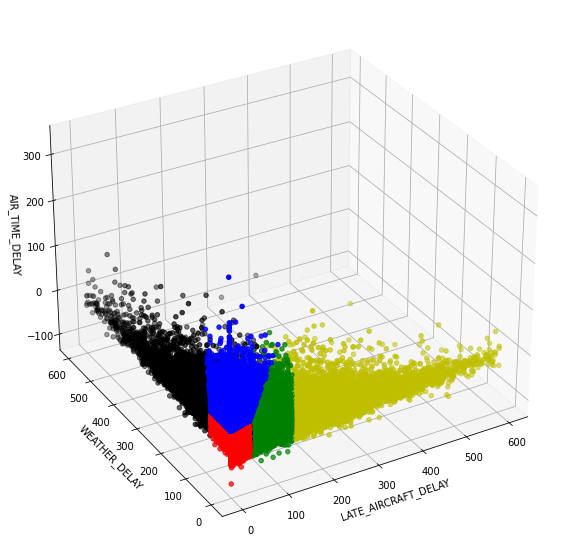

In [24]:
from matplotlib import pyplot as plt

LABEL_COLOR_MAP = {"c1" : 'r',
                   "c2" : 'y',
                   "c3" : 'b',
                   "c4" : 'g',
                   "c5": 'black'
                   }
label_color = [LABEL_COLOR_MAP[l] for l in clustering_data["CLUSTER"]]

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = plt.axes(projection='3d')
zdata = clustering_data["AIR_TIME_DELAY"]
xdata = clustering_data["LATE_AIRCRAFT_DELAY"]
ydata = clustering_data["WEATHER_DELAY"]

ax.scatter3D(xdata, ydata, zdata, c=label_color)
ax.view_init(30, -120)
ax.set_xlabel("LATE_AIRCRAFT_DELAY")
ax.set_ylabel("WEATHER_DELAY")
ax.set_zlabel("AIR_TIME_DELAY")

In [44]:
for cluster in ["c1", "c2", "c3", "c4", "c5"]:
    print(cluster)
    print("AIRTIME DELAY")
    print(clustering_data.loc[clustering_data["CLUSTER"] == cluster]["AIR_TIME_DELAY"].max(), clustering_data.loc[clustering_data["CLUSTER"] == cluster]["AIR_TIME_DELAY"].min())
    print(clustering_data.loc[clustering_data["CLUSTER"] == cluster]["AIR_TIME_DELAY"].mean())
    print("LATE_AIRCRAFT_DELAY")
    print(clustering_data.loc[clustering_data["CLUSTER"] == cluster]["LATE_AIRCRAFT_DELAY"].max(), clustering_data.loc[clustering_data["CLUSTER"] == cluster]["LATE_AIRCRAFT_DELAY"].min())
    print(clustering_data.loc[clustering_data["CLUSTER"] == cluster]["LATE_AIRCRAFT_DELAY"].mean())
    print("WEATHER_DELAY")
    print(clustering_data.loc[clustering_data["CLUSTER"] == cluster]["WEATHER_DELAY"].max(), clustering_data.loc[clustering_data["CLUSTER"] == cluster]["WEATHER_DELAY"].min())
    print(clustering_data.loc[clustering_data["CLUSTER"] == cluster]["WEATHER_DELAY"].mean())


c1
AIRTIME DELAY
19.0 -105.0
-5.1044743036036655
LATE_AIRCRAFT_DELAY
42.0 0.0
10.578990425264506
WEATHER_DELAY
79.0 0.0
1.2307396997326387
c2
AIRTIME DELAY
211.0 -66.0
-4.100089644151693
LATE_AIRCRAFT_DELAY
600.0 132.0
192.27625989008848
WEATHER_DELAY
226.0 0.0
2.4705148692364656
c3
AIRTIME DELAY
330.0 10.0
27.23334861726714
LATE_AIRCRAFT_DELAY
102.0 0.0
2.501039770648363
WEATHER_DELAY
92.0 0.0
1.3973128065470815
c4
AIRTIME DELAY
148.0 -76.0
-3.4367332719536168
LATE_AIRCRAFT_DELAY
132.0 41.0
72.43653420260283
WEATHER_DELAY
112.0 0.0
1.1331110392249566
c5
AIRTIME DELAY
198.0 -54.0
8.794081979141401
LATE_AIRCRAFT_DELAY
312.0 0.0
8.328159107446034
WEATHER_DELAY
595.0 75.0
150.44591317002184


    Your answer:
    The first cluster, which is colored red in the plot, contains all instances that have a small AIR_TIME_DELAY while having small values for WEATHER_DELAY and LATE_AIRCRAFT_DELAY as well.
    The mean value of AIR_TIME_DELAY in this cluster equals -5.10, which shows that the clustered instances arrive mostly on time at the destination airport. The maximum value in cluster 1
    for AIR_TIME_DELAY is 19.0 and the minimum value is -105.0, which shows that no flights arrive much too late at the destination airport. Accordingly, as the flights are mostly not delayed, the 
    values for WEATHER_DELAY and LATE_AIRCRAFT_DELAY are small as well, as it can be seen in the plot.

    The blue cluster, which is cluster 3, contains instances that have a larger AIR_TIME_DELAY while having small values for WEATHER_DELAY and LATE_AIRCRAFT_DELAY. The AIR_TIME_DELAY values in this
    cluster are strictly positive and lie between 10 and 330 with a mean of 27.23, i.e. all flights in cluster 3 are delayed. On average, the instances in cluster 3 have a LATE_AIRCRAFT_DELAY of 2.50 and a WEATHER_DELAY of 1.40. Thus, cluster 3 contains the flights that are delayed but not due to a LATE_AIRCRAFT_DELAY or a WEATHER_DELAY. 

    The green cluster, i.e. cluster 4, contains all flights which have a comparably large LATE_AIRCRAFT_DELAY, while not having a WEATHER_DELAY. The instances were not clustered based on 
    AIR_TIME_DELAY as the values for this attribute range from -76 to 148 in this cluster. The mean of LATE_AIRCRAFT_DELAY in cluster 4 is 72.44, while the mean of WEATHER_DELAY is only 1.13, which
    supports the given interpretation.

    The yellow cluster, cluster 2, contains, similarly to cluster 4, instances that have a large LATE_AIRCRAFT_DELAY, a low WEATHER_DELAY and an arbitrary AIR_TIME_DELAY. Similar to cluster 4, the
    AIR_TIME_DELAY ranges from -66.0 to 211.0, which implies that the instances were not clustered based on this attribute. Additionally, the average WEATHER_DELAY is 2.47 and thus similarly low
    to cluster 4. Nevertheless, the average value for LATE_AIRCRAFT_DELAY is 192.28 in cluster 2, which is much higher than it is in cluster 4. Additionally, the values for LATE_AIRCRAFT_DELAY
    range from 132 to 600, while they only range from 41 to 132 in cluster 4. This shows, that cluster 2 contains instances that have a LATE_AIRCRAFT_DELAY higher or equal than 132, while 
    cluster 4 contains instances that have a LATE_AIRCRAFT_DELAY lower or equal to 132.

    The black cluster, cluster 5, contains instances with a high WEATHER_DELAY. The average value of WEATHER_DELAY is 150.45 in this cluster, while the values range from 75.0 to 595.0. 
    On average, the instances in this cluster have a small LATE_AIRCRAFT_DELAY of 8.33. The instances have on average a small AIR_TIME_DELAY of 8.79 but the values range from -54 to 198,
    which hints that the instances were not mainly clustered based on this attribute.